In [58]:
import pandas as pd

# Import the datset and explore basic info(nulls, data types)
df = pd.read_csv("/content/Titanic-Dataset.csv")
df.head()
#checking for nulls and data types
df.info()
df.isnull().sum()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [59]:
# Handle missing values using mean/median/imputation.
# Step 1: Import required libraries
import pandas as pd

# Step 2: Load the dataset
df = pd.read_csv("Titanic-Dataset.csv")

# Step 3: Check missing values before handling
print("Missing values before handling:")
print(df.isnull().sum())

# Step 4: Handle missing values

# 1. Fill Age column with the median (robust for skewed data)
if 'Age' in df.columns:
    df['Age'].fillna(df['Age'].median(), inplace=True)

# 2. Fill Fare column with the mean (common for continuous numeric values)
if 'Fare' in df.columns:
    df['Fare'].fillna(df['Fare'].mean(), inplace=True)

# 3. Fill Embarked with mode (most frequent value) - suitable for categorical columns
if 'Embarked' in df.columns:
    df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# 4. Fill Cabin with a placeholder (optional - if you want to keep the column)
if 'Cabin' in df.columns:
    df['Cabin'].fillna("Unknown", inplace=True)

# 5. Drop any remaining rows with missing data (if absolutely necessary)
df.dropna(inplace=True)

# Step 5: Check missing values after handling
print("\nMissing values after handling:")
print(df.isnull().sum())


Missing values before handling:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Missing values after handling:
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


<ipython-input-59-846db3f37942>:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
<ipython-input-59-846db3f37942>:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

In [60]:
# Encoding categorical features
import pandas as pd

# Load the dataset
df = pd.read_csv("Titanic-Dataset.csv")

# Step 1: Handle missing values (as in the previous step)
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Fare'].fillna(df['Fare'].mean(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df['Cabin'].fillna("Unknown", inplace=True)
df.dropna(inplace=True)

# Step 2: Convert categorical columns to numeric

# Label Encoding for 'Sex' column
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

# One-Hot Encoding for 'Embarked' column (optional: drop_first=True to avoid dummy variable trap)
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)

# (Optional) You can one-hot encode other categorical columns like 'Cabin' or 'Pclass' if needed
# But many models can handle 'Pclass' as numerical already

# Step 3: Check result
print(df.head())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name  Sex   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris    0  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    1  38.0      1      0   
2                             Heikkinen, Miss. Laina    1  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    1  35.0      1      0   
4                           Allen, Mr. William Henry    0  35.0      0      0   

             Ticket     Fare    Cabin  Embarked_Q  Embarked_S  
0         A/5 21171   7.2500  Unknown       False        True  
1          PC 17599  71.2833      C85       False       False  
2  STON/O2. 3101282   7.9250  Unknown       False        True  
3            113803  53.1000     C123   

<ipython-input-60-a41154908763>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
<ipython-input-60-a41154908763>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

In [61]:
#To normalize numerical feature
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# List of numerical columns to scale
num_cols = ['Age','SibSp','Parch', 'Fare']

# 🔹 Option 1: Standardization (mean = 0, std = 1)
scaler = StandardScaler()
df_standardized = df.copy()
df_standardized[num_cols] = scaler.fit_transform(df_standardized[num_cols])

# 🔹 Option 2: Normalization (scales between 0 and 1)
minmax_scaler = MinMaxScaler()
df_normalized = df.copy()
df_normalized[num_cols] = minmax_scaler.fit_transform(df_normalized[num_cols])

# Display results
print("Standardized data:")
print(df_standardized[num_cols].head())

print("\nNormalized data:")
print(df_normalized[num_cols].head())

Standardized data:
        Age     SibSp     Parch      Fare
0 -0.565736  0.432793 -0.473674 -0.502445
1  0.663861  0.432793 -0.473674  0.786845
2 -0.258337 -0.474545 -0.473674 -0.488854
3  0.433312  0.432793 -0.473674  0.420730
4  0.433312 -0.474545 -0.473674 -0.486337

Normalized data:
        Age  SibSp  Parch      Fare
0  0.271174  0.125    0.0  0.014151
1  0.472229  0.125    0.0  0.139136
2  0.321438  0.000    0.0  0.015469
3  0.434531  0.125    0.0  0.103644
4  0.434531  0.000    0.0  0.015713


# New Section

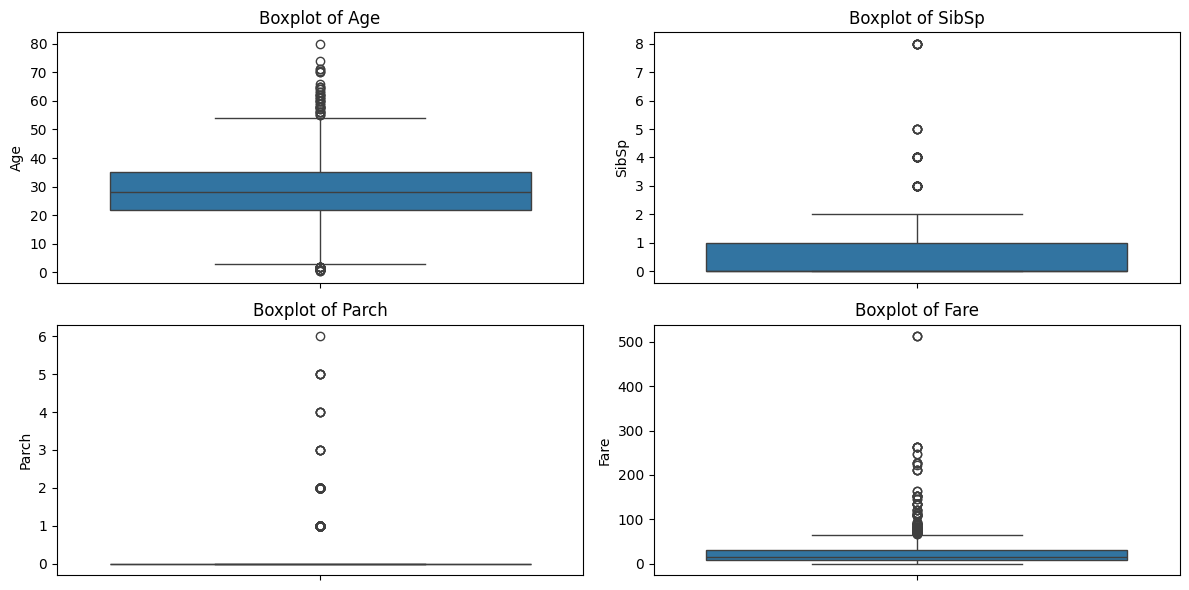

In [62]:
#visualise the outliers
import seaborn as sns
import matplotlib.pyplot as plt

# List of numerical columns to scale
num_cols = ['Age','SibSp','Parch', 'Fare'] # Choose the actual numerical columns

plt.figure(figsize=(12,6))
for i,col in enumerate(num_cols):
  # Add 1 to i to start indexing from 1
  plt.subplot(2, 2, i + 1)
  sns.boxplot(y=df[col]) # Use x=df[col] to specify data for boxplot
  plt.title(f'Boxplot of {col}')
  plt.tight_layout()
plt.show()

In [63]:
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Remove outliers from multiple columns
for col in ['Fare', 'SibSp', 'Parch']:
    df = remove_outliers_iqr(df, col)

# Print shape to show how many rows remain
print("New dataset shape:", df.shape)



New dataset shape: (607, 13)
